In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
# from statsmodels.formula.api import ols
# from statsmodels.tools.eval_measures import rmse
%matplotlib inline

In [2]:
ds_repair = pd.read_csv("./csvfiles/부품수리시간.csv", encoding='cp949')

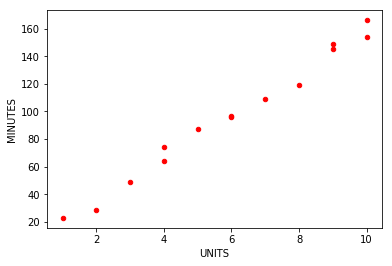

In [62]:
ds_repair.plot.scatter(x="UNITS", y="MINUTES", c=['red'])

In [4]:
ds_repair.corr(method='pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [ ]:
ds_repair_x = ds_repair["UNITS"]
ds_repair_y = ds_repair["MINUTES"]
ds_repair_x_const = sm.add_constant(ds_repair_x)

reg_model = sm.OLS(ds_repair_y, ds_repair_x_const)
reg_results = reg_model.fit()
print(reg_results.summary())

In [ ]:
sns.residplot(ds_repair_x, ds_repair_y)

In [ ]:
obs = ds_repair_x.values
z = (obs-np.mean(obs))/np.std(obs)
#정규 확률도
stats.probplot(z,dist='norm',plot=plt)

# 다중 회귀분석 01/30

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale

In [6]:
ds_health = pd.read_csv("csvfiles/체질검사.csv", encoding='cp949')

In [7]:
ds_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
FAT        252 non-null float64
AGE        252 non-null int64
WEIGHT     252 non-null float64
HEIGHT     252 non-null float64
NECK       252 non-null float64
CHEST      252 non-null float64
ABDOMEN    252 non-null float64
HIP        252 non-null float64
THIGH      252 non-null float64
KNEE       252 non-null float64
ANKLE      252 non-null float64
BICEPS     252 non-null float64
FOREARM    252 non-null float64
WRIST      252 non-null float64
dtypes: float64(13), int64(1)
memory usage: 27.6 KB


In [8]:
ds_health.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [17]:
ds_health_y = ds_health["FAT"]
ds_health_x = ds_health.drop("FAT", axis=1)

print("목표변수 데이터 크기:{}1".format(ds_health_y.shape))
print("X변수 데이터 크기:{}".format(ds_health_x.shape))

목표변수 데이터 크기:(252,)1
X변수 데이터 크기:(252, 13)


In [21]:
ds_health_y = ds_health["FAT"]
ds_health_x = ds_health.drop(["FAT",'WEIGHT'], axis=1)
print("목표변수 데이터 크기:{}1".format(ds_health_y.shape))
print("X변수 데이터 크기:{}".format(ds_health_x.shape))

목표변수 데이터 크기:(252,)1
X변수 데이터 크기:(252, 12)


In [22]:
# 절편 추가
ds_health_x_const = sm.add_constant(ds_health_x)
ds_health_x_const.head()

,const,AGE,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1.0,46,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,1.0,27,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,1.0,69,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,1.0,57,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,1.0,51,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [23]:
# 회귀 모델 생성
reg_multi_model = sm.OLS(ds_health_y, ds_health_x_const)
#적합
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           3.75e-64
Time:                        13:57:22   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5453      7.672      0.984      0.3

1. No. Observations : 252
   Df Residuals(잔차 자유도) : 238
   Df Model(모델 자유도) : 13
2. ANOVA 분석결과
   -> p값이 유의 수준 0.05보다 작으므로 회귀모델로서 유의
3. 설명력 : 0.749
   -> 모델을 통하여 설명변수 EVAL을 74.9% 설명할 수 있음
4. 회귀계수 검정
   -> 절편의 p값이 유의수준 0.05보다 크므로 계수로서 유의하지 않음(회귀 모델에서 절편은 유의하지 않더라도 모델에 포함)
   -> ABDOMEN의 p값이 유의수준 0.05보다 작으므로 계수로서 유의
   -> WRIST의 p값이 유의수준 0.05보다 작으므로 계수로서 유의

#### 회귀 모델 생성 : 전체 설명변수 대상으로 다중 공선성 검토

In [20]:
ds_vif = pd.DataFrame()
ds_vif['variable'] = ds_health_x_const.columns
ds_vif["VIF"] = [variance_inflation_factor(ds_health_x_const.values, i) for i in range(ds_health_x_const.shape[1])]
ds_vif.sort_values("VIF", inplace=True)
ds_vif.round(3)

,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


In [24]:
# Weight 뺀거
ds_vif = pd.DataFrame()
ds_vif['variable'] = ds_health_x_const.columns
ds_vif["VIF"] = [variance_inflation_factor(ds_health_x_const.values, i) for i in range(ds_health_x_const.shape[1])]
ds_vif.sort_values("VIF", inplace=True)
ds_vif.round(3)

,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


### 후진 제거법을 이용한 변수 선택

In [29]:
model = LinearRegression()
rfe = RFE(estimator= model, n_features_to_select=4).fit(ds_health_x, ds_health_y)

#선택된 변수
selected_cols = ds_health_x.columns[rfe.support_]
removed_cols = ds_health_x.columns[~rfe.support_]

print("Selected features:{}".format(selected_cols))
print("Removed features:{}".format(removed_cols))      

Selected features:Index(['NECK', 'ABDOMEN', 'FOREARM', 'WRIST'], dtype='object')
Removed features:Index(['AGE', 'HEIGHT', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [35]:
num_col = selected_cols.copy()

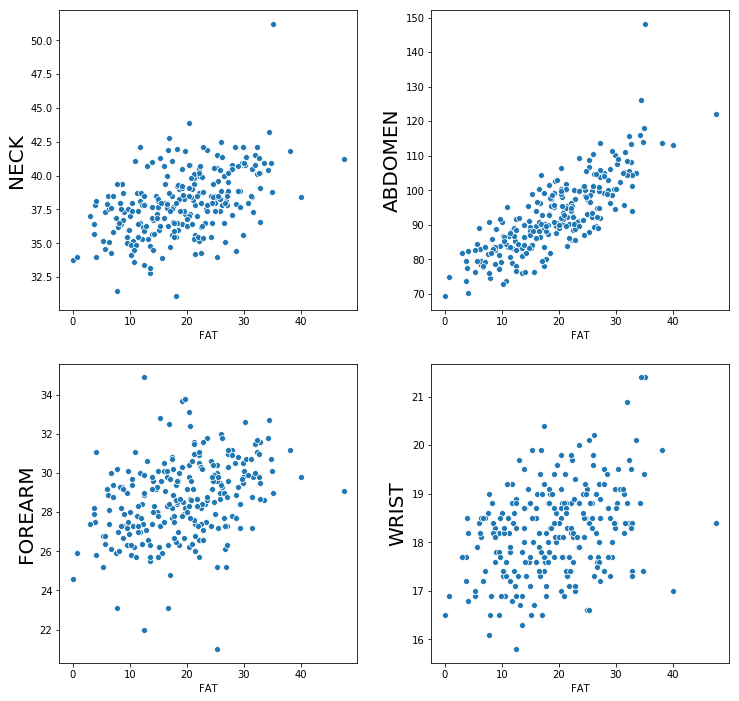

In [56]:
rows = 2
if((((len(num_col) + 1) // rows) % rows) == 0): 
    cols = (len(num_col)+1) // rows
else:
    cols = ((len(num_col)+1) // rows) + ((len(num_col) // rows) % rows)

fig, axs = plt.subplots(rows, cols, figsize=(12,12))
fig.subplots_adjust(hspace = 0.18, wspace=0.25)
axs = axs.ravel()
for j,k in enumerate(num_col):
    b = sns.scatterplot(y = k, x = 'FAT', data=ds_health,ax = axs[j],)
    b.set_ylabel(k,fontsize=20)

In [30]:
ds_health_x_rfe = sm.add_constant(ds_health_x_const[selected_cols])
reg_multi_rfe_model = sm.OLS(ds_health_y, ds_health_x_rfe)
reg_multi_rfe_results = reg_multi_rfe_model.fit()
print(reg_multi_rfe_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     154.1
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           6.80e-66
Time:                        13:59:13   Log-Likelihood:                -734.77
No. Observations:                 252   AIC:                             1480.
Df Residuals:                     247   BIC:                             1497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4679      5.959     -1.085      0.2

/home/pirl/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
ds_rfe_vif = pd.DataFrame()
ds_rfe_vif['features'] = ds_health_x_rfe.columns
ds_rfe_vif["VIF"] = [variance_inflation_factor(ds_health_x_rfe.values, i) for i in range(ds_health_x_rfe.shape[1])]
ds_rfe_vif.sort_values("VIF", inplace=True)
ds_rfe_vif.round(3)

,features,VIF
3,FOREARM,1.732
2,ABDOMEN,2.363
4,WRIST,2.409
1,NECK,3.533
0,const,439.469


#### 최종 회귀식

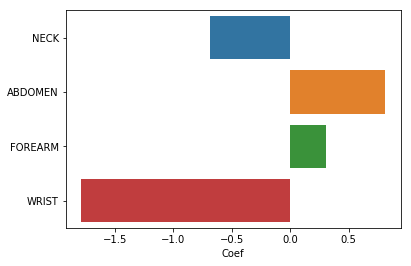

In [32]:
ds_reg_coef = pd.DataFrame({"Coef":reg_multi_rfe_results.params.values[1:]},
                           index=reg_multi_rfe_model.exog_names[1:])

# ds_reg_coef.plot.barh(y='Coef', legend = True, )
sns.barplot(data=ds_reg_coef, x = 'Coef', y =ds_reg_coef.index)

In [66]:
ds_reg_coef.head()

,Coef
NECK,-0.681743
ABDOMEN,0.814409
FOREARM,0.304362
WRIST,-1.787362


### 표준화 후 설명력 

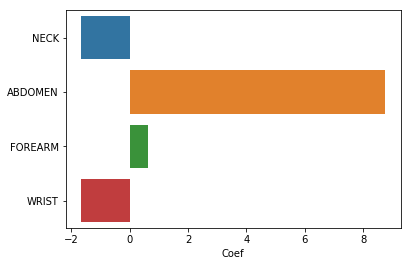

In [33]:
# 데이터 표준화, 평균 0, 표준편차 1
ds_health_x_scaled = scale(ds_health_x_const[selected_cols])
# 후진제거법에 의하여 선택된 데이터에 상수 1입력
ds_health_x_scaled = sm.add_constant(ds_health_x_scaled)
# 회귀 모델 생성
reg_multi_scaled_model = sm.OLS(ds_health_y, ds_health_x_scaled)
# 적합
reg_multi_scaled_results = reg_multi_scaled_model.fit()
# 설명변수 중요도
ds_reg_scaled_coef = pd.DataFrame({"Coef":reg_multi_scaled_results.params.values[1:]},
                                 index = reg_multi_rfe_model.exog_names[1:])
sns.barplot(data=ds_reg_scaled_coef, x = 'Coef', y =ds_reg_scaled_coef.index)

### formula를 이용한 회귀분석

In [63]:
ds_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
FAT        252 non-null float64
AGE        252 non-null int64
WEIGHT     252 non-null float64
HEIGHT     252 non-null float64
NECK       252 non-null float64
CHEST      252 non-null float64
ABDOMEN    252 non-null float64
HIP        252 non-null float64
THIGH      252 non-null float64
KNEE       252 non-null float64
ANKLE      252 non-null float64
BICEPS     252 non-null float64
FOREARM    252 non-null float64
WRIST      252 non-null float64
dtypes: float64(13), int64(1)
memory usage: 27.6 KB


In [65]:
import statsmodels.formula.api as smf

formula_model = smf.ols(formula = "FAT~NECK + ABDOMEN + FOREARM + WRIST+WEIGHT+THIGH", data = ds_health)
formula_result = formula_model.fit()
print(formula_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     115.8
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           1.24e-68
Time:                        14:55:57   Log-Likelihood:                -723.03
No. Observations:                 252   AIC:                             1460.
Df Residuals:                     245   BIC:                             1485.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.1132      8.985     -4.019      0.0